In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import font_manager, rc
import matplotlib

 
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
matplotlib.rcParams['axes.unicode_minus'] = False

In [2]:
trash=pd.read_csv("D:\\jupyter_proj\\gongbig/trash.csv",encoding='cp949')

In [3]:
trash.shape
trash.head(5)

,년도,수거장소,월,분류,상세분류,개수,위도,경도,측정소
0,2019,통영 망일봉,1,플라스틱류,"끈(노끈, 포장용끈)",1,34.84861,128.430967,통영
1,2019,통영 망일봉,1,금속,"캔, 가스캔, 낚시바늘, 낚시추, 스프링 통발, 스프레이캔, 못, 철사, 폭죽 철심 등",1,34.84861,128.430967,통영
2,2019,통영 망일봉,1,목재,"나무젓가락, 아이스크림 막대, 나무 팔레트, 건축용 목재, 어업용/양식장용 목재, ...",1,34.84861,128.430967,통영
3,2019,통영 망일봉,1,종이,"종이컵, 우유팩, 종이쇼핑백, 종이상자, 폭죽 종이포장 등",1,34.84861,128.430967,통영
4,2019,통영 망일봉,1,천연 섬유,"옷, 모자, 양말, 천, 장갑(면장갑, 목장갑, 코팅목장갑) 등 천연 섬유만 해당",1,34.84861,128.430967,통영


# 시각화--------------------------------------------------------------------------------------------------------------------------------------------

# 1. 전체 기간

### 1-1. 수집기간 동안 총 쓰레기 수 변화

In [54]:
year_month_cnt_pivot=trash.pivot_table(index=['년도','월'],
                 values='개수',
                 aggfunc=sum).reset_index()

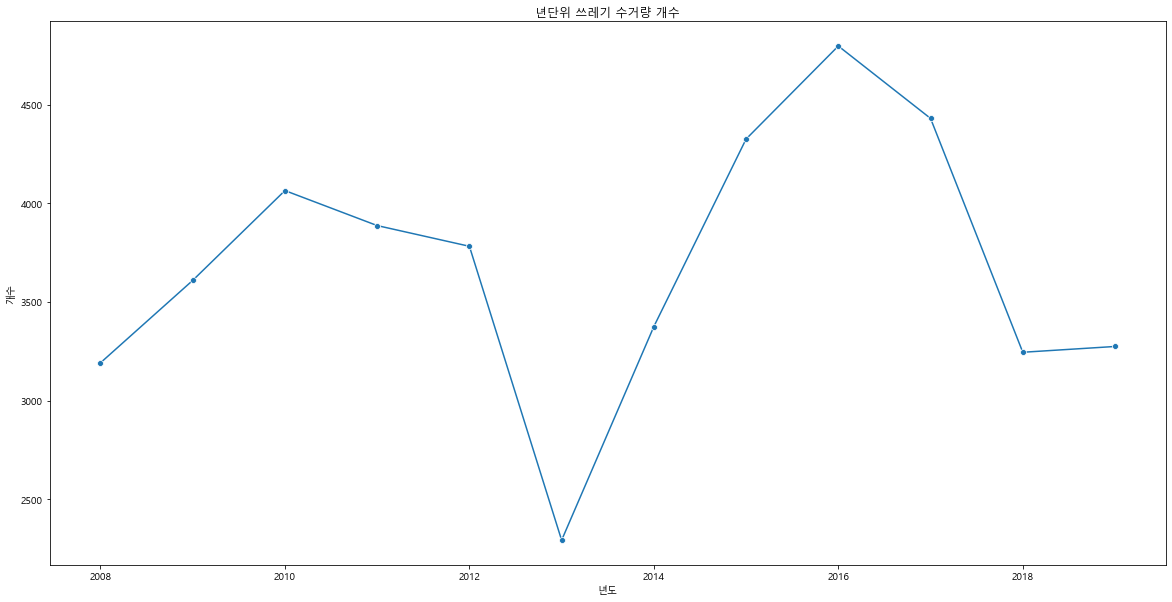

In [72]:
#년단위
plt.figure(figsize=(20,10))
sns.lineplot(data=year_month_cnt_pivot,x='년도',y='개수',marker='o',ci=None)
plt.title("년단위 쓰레기 수거량 개수")
plt.show()

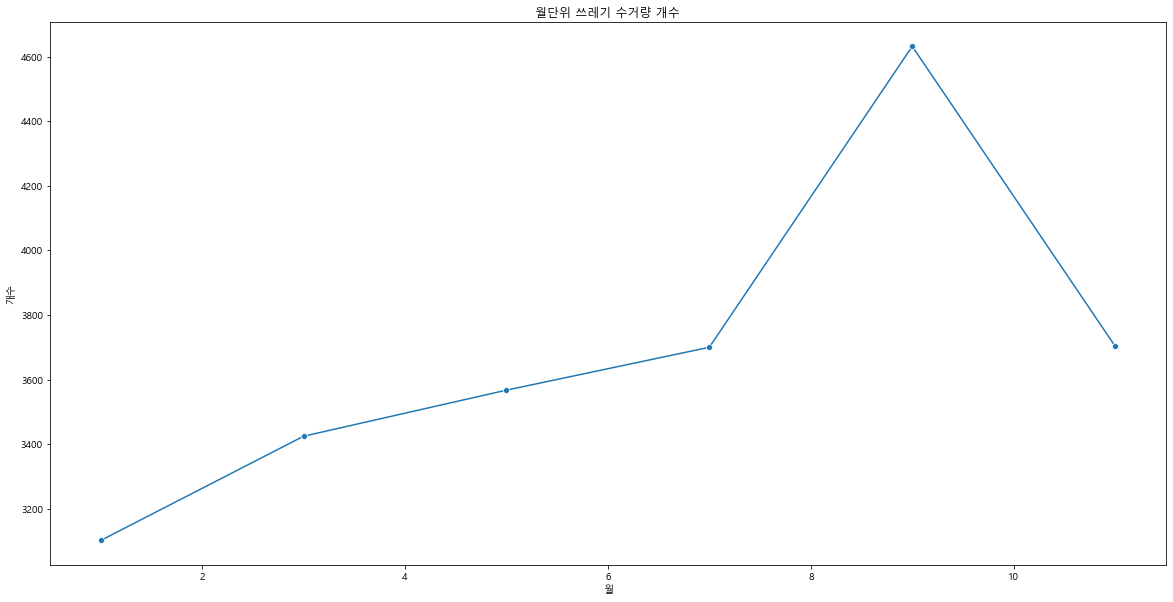

In [74]:
#월단위
plt.figure(figsize=(20,10))
sns.lineplot(data=year_month_cnt_pivot,x='월',y='개수',marker='o',ci=None)
plt.title("월단위 쓰레기 수거량 개수")
plt.show()

### 1-1. 각 수집장소별 유형별 갯수(합) 

In [4]:
loc_type_pivot=trash.pivot_table(index=['수거장소','분류'],
                 values='개수',
                 aggfunc=sum).reset_index()

Text(0.5, 1.0, '수집장소별 유형별 갯수(합)')

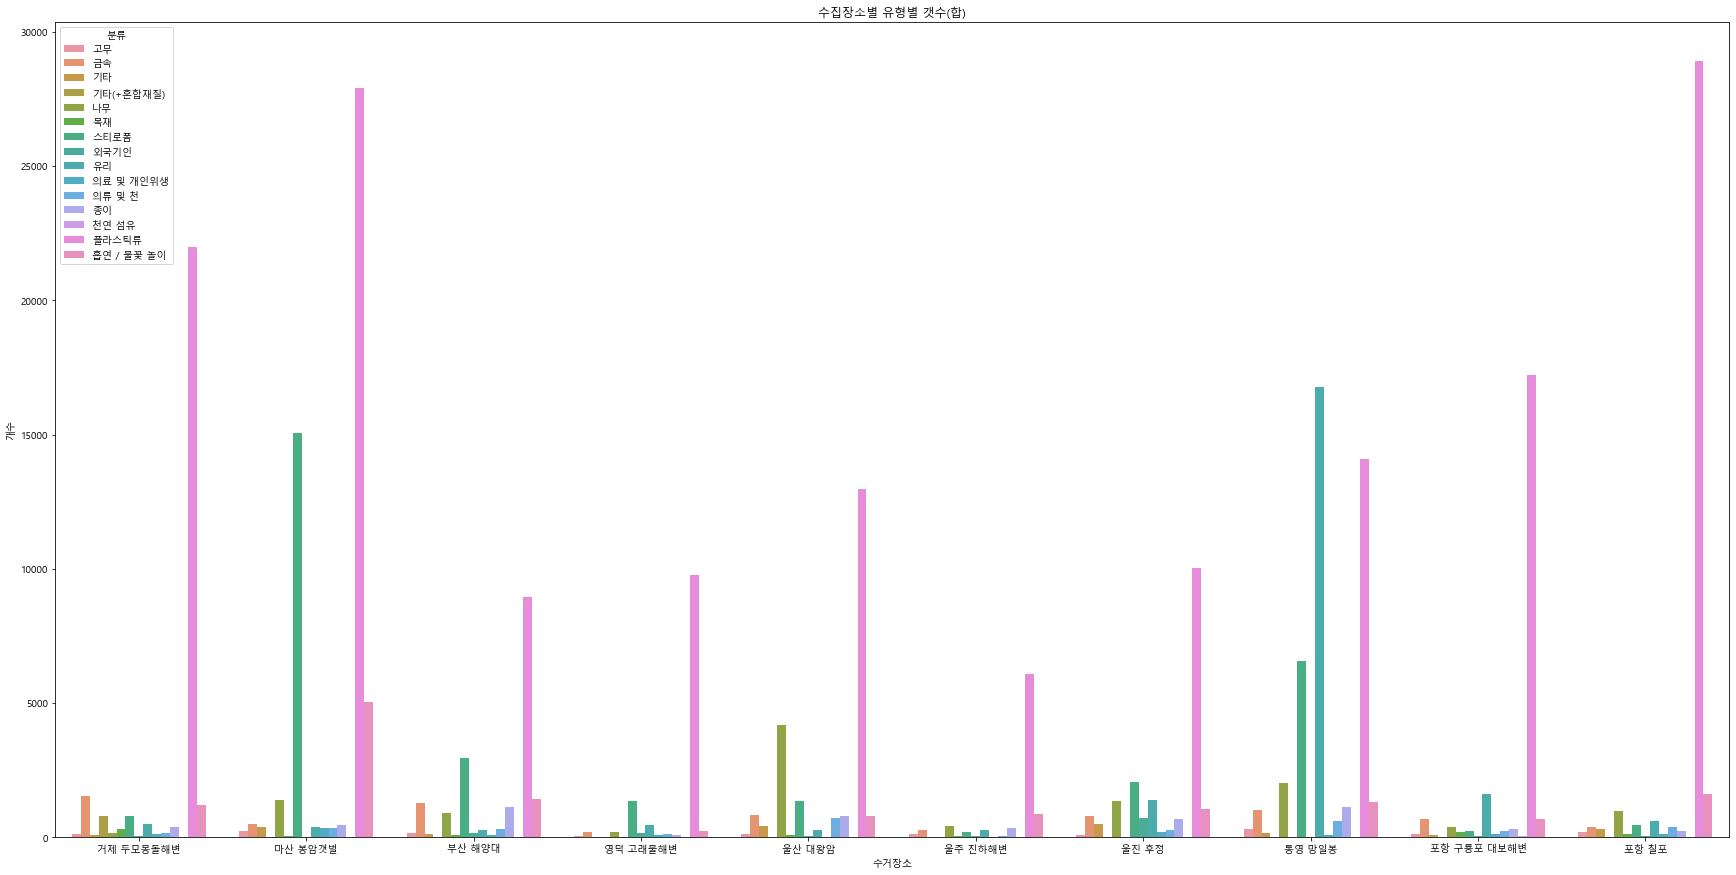

In [53]:
plt.figure(figsize=(30, 15))
sns.barplot(data=loc_type_pivot,x='수거장소',y='개수',hue='분류',ci=None)
plt.title("수집장소별 유형별 갯수(합)")

In [ ]:
# 수거장소별 top3 유형
sort_pivot=loc_type_pivot.sort_values(['수거장소','개수'],ascending=False).head(50)

In [60]:
top3_df=pd.DataFrame(loc_type_pivot.groupby(['수거장소', '분류'])['개수'].agg('sum').groupby(level=0).nlargest(3)).droplevel(0).reset_index()

Text(0.5, 1.0, '수집장소별 유형별 개수 top3')

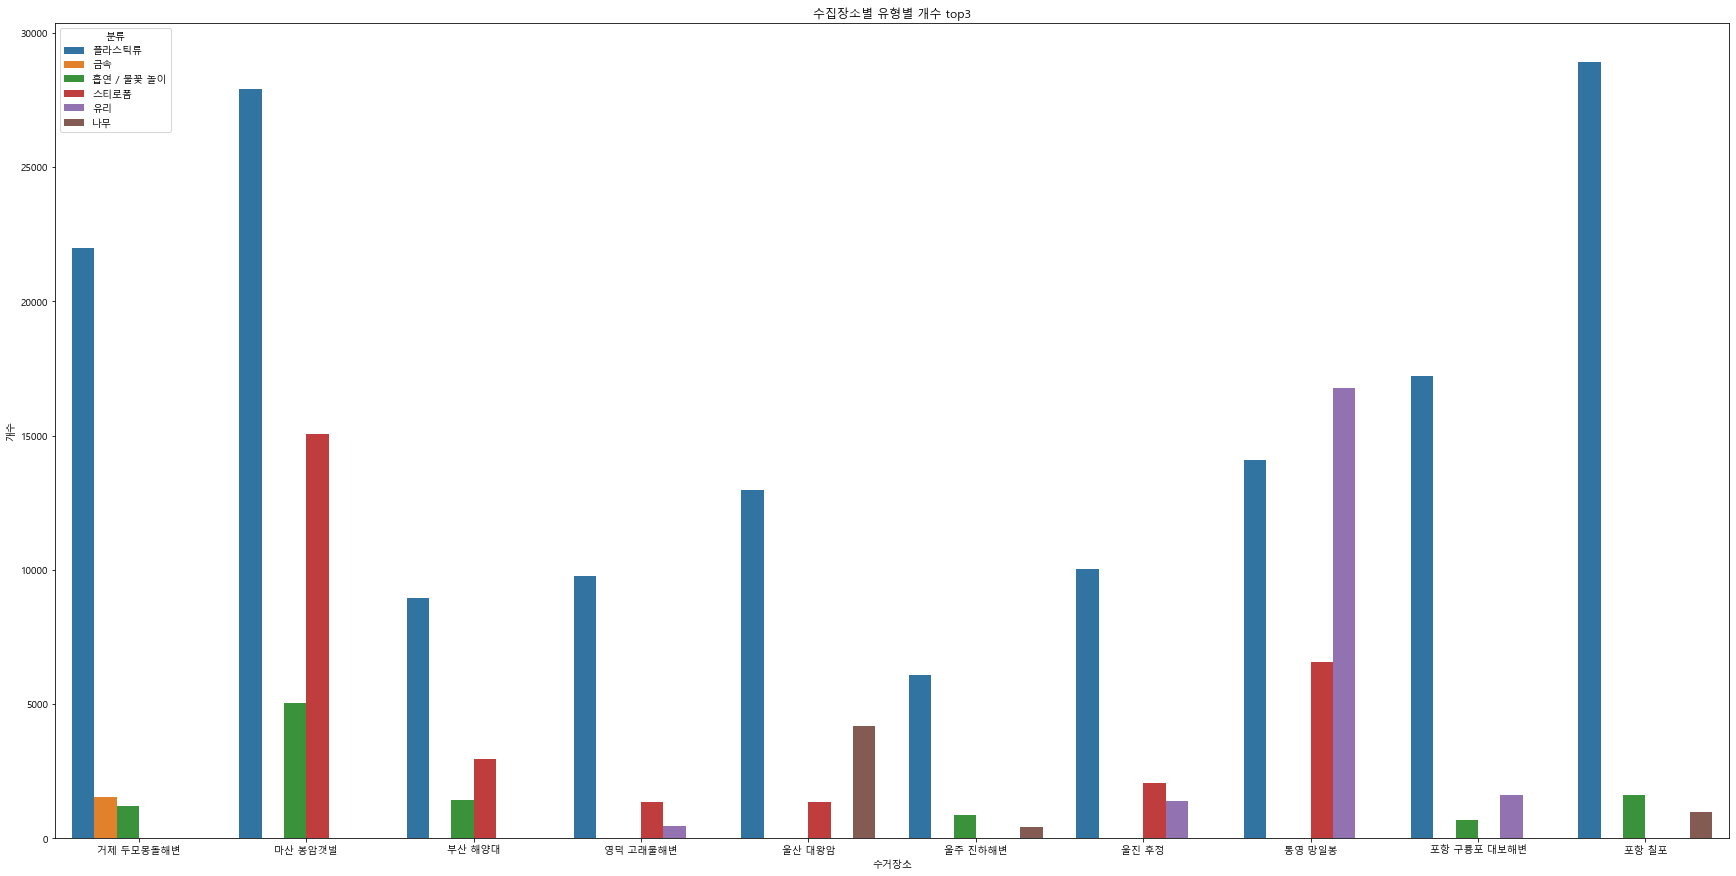

In [63]:
plt.figure(figsize=(30, 15))
sns.barplot(data=top3_df,x='수거장소',y='개수',hue='분류',ci=None)
plt.title("수집장소별 유형별 개수 top3")

### 1-2. 

# 통계분석 --------------------------------------------------------------------------------------------------------------------------------------

# 1. 카이제곱 검정

###  1-1. 지역과 쓰레기 유형에 따른 쓰레기 관측 기대빈도가 다른가

In [82]:
cross_table=loc_type_pivot.pivot("수거장소", "분류", "개수")
cross_table=cross_table.fillna(0)
cross_table

분류,고무,금속,기타,기타(+혼합재질),나무,목재,스티로폼,외국기인,유리,의료 및 개인위생,의류 및 천,종이,천연 섬유,플라스틱류,흡연 / 불꽃 놀이
수거장소,,,,,,,,,,,,,,,
거제 두모몽돌해변,114.0,1552.0,87.0,813.0,178.0,308.0,808.0,57.0,508.0,129.0,161.0,386.0,18.0,21978.0,1200.0
마산 봉암갯벌,254.0,501.0,392.0,2.0,1388.0,40.0,15045.0,0.0,373.0,342.0,356.0,470.0,0.0,27925.0,5041.0
부산 해양대,148.0,1284.0,116.0,23.0,910.0,87.0,2966.0,179.0,283.0,95.0,294.0,1122.0,11.0,8935.0,1418.0
영덕 고래불해변,67.0,211.0,16.0,2.0,203.0,17.0,1365.0,169.0,442.0,88.0,133.0,84.0,3.0,9770.0,240.0
울산 대왕암,119.0,822.0,423.0,18.0,4198.0,95.0,1360.0,42.0,283.0,29.0,732.0,807.0,23.0,12964.0,794.0
울주 진하해변,113.0,284.0,11.0,27.0,425.0,51.0,191.0,52.0,279.0,12.0,67.0,341.0,30.0,6100.0,872.0
울진 후정,96.0,812.0,482.0,7.0,1353.0,13.0,2070.0,739.0,1377.0,189.0,262.0,691.0,0.0,10024.0,1053.0
통영 망일봉,297.0,1022.0,149.0,18.0,2042.0,31.0,6553.0,24.0,16784.0,102.0,619.0,1128.0,5.0,14079.0,1331.0
포항 구룡포 대보해변,124.0,685.0,96.0,14.0,391.0,196.0,244.0,46.0,1610.0,111.0,243.0,330.0,33.0,17237.0,688.0


In [83]:
import scipy.stats

chi2, pvalue, dof, expected = scipy.stats.chi2_contingency(cross_table)

In [84]:
chi2

126750.41596301635

In [86]:
dof

126

In [89]:
pvalue
# 결론 : 수거장소와 유형은 서로 독립이 아님

0.0